# Data Science / Machine Learning pipeline

**Importar** Datos => **Procesar** Datos => **Representar** Datos

## Caso de estudio: Movilens

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('movielens/movies.csv', sep=',')
tags = pd.read_csv('movielens/tags.csv', sep=',')
ratings = pd.read_csv('movielens/ratings.csv', sep=',')

movies.head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [7]:
ratings.tail(10)

,userId,movieId,rating,timestamp
20000253,138493,60816,4.5,1259865163
20000254,138493,61160,4.0,1258390537
20000255,138493,65682,4.5,1255816373
20000256,138493,66762,4.5,1255805408
20000257,138493,68319,4.5,1260209720
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944
20000262,138493,71619,2.5,1255811136


In [3]:
# De momento vamos a eliminar las columnas timestamp en tags y ratings.

del ratings['timestamp']
del tags['timestamp']

In [11]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [5]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


### Operamos con Series

In [6]:
# Estraemos una fila y confirmamos que es una Serie.

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [7]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [8]:
# Imprimimos los índices de esta fila (Serie).

row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [9]:
row_0['userId']

18

### Operamos con DataFrames

In [10]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [11]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [12]:
# Extraer varias filas de una sola vez.

tags.iloc[[0, 21, 2005]]

,userId,movieId,tag
0,18,4141,Mark Waters
21,65,6874,dark hero
2005,910,97938,stranded


### Analizar la estadistica básica del conjunto

In [13]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [14]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [17]:
# El promedio de una columna.

ratings['rating'].mean()

3.5255285642993797

In [18]:
# El promedio de todo el dataframe.

ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [19]:
# El mínimo de una columna.
ratings['rating'].min()

0.5

In [20]:
# El máximo de una columna.

ratings['rating'].max()

5.0

In [21]:
# La desviación standard de una columna.

ratings['rating'].std()

1.051988919275684

In [22]:
# La moda de una columna.

ratings['rating'].mode()

0    4.0
dtype: float64

In [23]:
# Este mótodo nos permite observar una posible correlación de una columna respecto a
# las demás.

# Una correlación negativa nos indicaría una relación inversa.
# Una correlación positiva nos indicaría una relación directa.

# ¿Realmente puede existir alguna correlación entre estas columnas (features)?
# ratings['testing'] = ratings['rating'] * 0.0000000000001

ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [27]:
# Estas líneas no solo están aquí para que practiquemos, ya estamos explorando y
# analizando nuestro dataset, tarea fundamental que tendremos que hacer antes de
# alimentar nuestro sistema de Machine Learning.

# ¿Qué pensáis que estamos buscando con estas líneas?

filter_1 = ratings['rating'] > 5
print(filter_1)

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


In [28]:
# Con las líneas anteriores buscamos en todos los datos de la columna rating valores
# que están mal o que no deberían estar ahí, por ejemplo mayores que 5.

# Ahora con el método any() buscamos si en el filtro aparece algún True.
filter_1.any()

False

In [29]:
# Se puede decir que esta columna tiene todos los datos bien.

### Data cleaning

In [31]:
# Imprimimos la forma del dataset movies.

movies.shape

(27278, 3)

In [32]:
# Imprimimos las 5 primeras filas para chequear.

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
# Lo primero es buscar si hay algun valor nulo.

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [34]:
# En el dataframe movies ha ido todo bien, no hay valores nulos en ninguna columna.

In [35]:
# Ahora hay que repetir lo mismo con los otros dos dataframes.

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [36]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [37]:
# En el caso del dataframe tags sí ha aparecido algun valor nulo en la columna tag.

In [101]:
# Veamos la forma de tags antes de hacer modificaciones en el dataframe.

count = tags.shape[0]
print(f'La cantidad de filas es: {count}')

La cantidad de filas es: 465548


In [41]:
# Borramos las filas que contengan algún valor nulo.
tags = tags.dropna()
print(f'Se han eliminado {count - tags.shape[0]} filas.')

Se han eliminado 16 filas.


In [42]:
# De este modo hemos borrado 16 filas de un dataframe con más de 20 millones de filas.
# Es importante saber cuando hemos "dañado" nuestro dataframe, en este caso muy poco.

In [100]:
# Para asegurarnos, comprobamos de nuevo si hay algun dato a null en el dataframe tags.

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

# Gráficos con Pandas

In [73]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

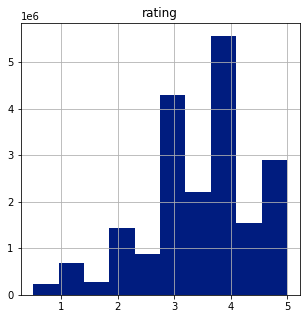

In [74]:
# Con el método hist() podremos dibujar histogramas que nos mostrará con cuánta
# frecuencia aparecen los valores.

ratings.hist(
    bins=10,
    column='rating',
    figsize=(5, 5)
)

# El parámetro bins indica la cantidad de barras en las que vamos a dividir el dataframe.

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

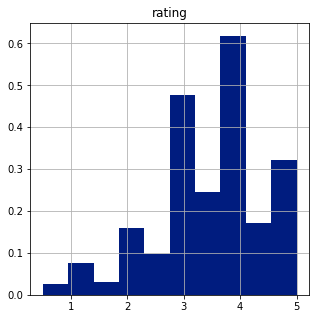

In [78]:
# Probabilidad de encontrar valor en ese bin.

ratings.hist(
    bins=10,
    column='rating',
    figsize=(5, 5),
    density=True
)

# El parámetro density se establece para ver la probabilidad de que un valor aparezca
# en el dataframe.

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

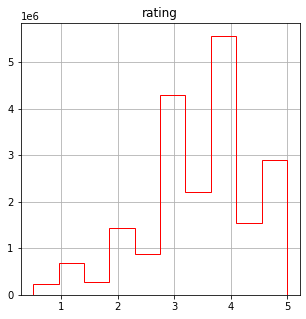

In [82]:
# También podemos cambiar el estilo del histograma y el color.

ratings.hist(
    bins=10,
    column='rating',
    figsize=(5, 5),
    histtype='step',
    color='red'
)

<AxesSubplot:>

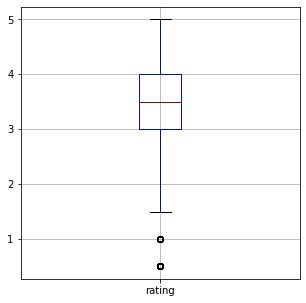

In [84]:
# Otro tipo de gráfico es el boxplot (gráfico de bigotes o cajas).

ratings.boxplot(
    column='rating',
    figsize=(5, 5)
)

In [85]:
# Los bigotes superior e inferior representan los valores máximos y mínimos normales
# (no outliers), y la cajita central tiene tres rayas horizontales, la de abajo es el
# primer Q (25%), la del medio es el segundo Q (50%) y la de arriba el tercer Q (75).

# Seleccionando columnas

In [88]:
# Las 5 primeras del dataframe tags.

tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [89]:
# Las 5 primeras del dataframe movies y solo las columnas title y genres.

movies[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [90]:
# Las 10 últimas filas del dataframe ratings.

ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [91]:
# Para ver las 10 últimas también podemos hacerlo con tail.

ratings.tail(10)

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [93]:
# Para contar cuantos registros distintos encuentra en una columna.

tag_counts = tags['tag'].value_counts()
tag_counts.head(10)

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

<AxesSubplot:>

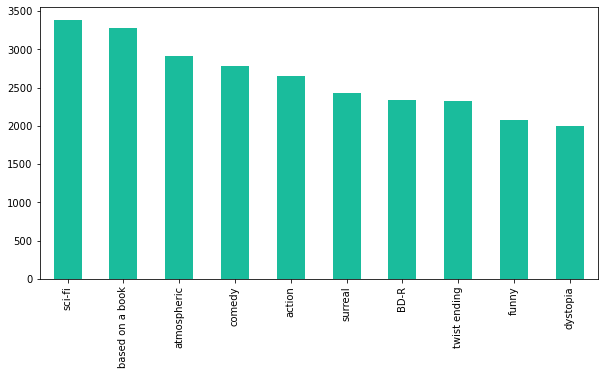

In [175]:
# Podemos pintar en un gráfico de barras el top 10 de tags.

tag_counts[:10].plot(
    kind='bar',
    figsize=(10, 5),
    color='#1ABC9C'
)

# Seleccionando / Filtrando filas

In [107]:
# Filtramos en el dataframe ratings las puntuaciones que son mayores o iguales a 4.0,
# luego aplicamos el filtro sobre el dataframe y mostramos los datos del 30 al 50.

filtro_mejores = ratings['rating'] >= 4.0
ratings[filtro_mejores][30:51]

,userId,movieId,rating
68,1,2021,4.0
69,1,2100,4.0
70,1,2118,4.0
71,1,2138,4.0
72,1,2140,4.0
73,1,2143,4.0
74,1,2173,4.0
75,1,2174,4.0
76,1,2193,4.0
79,1,2288,4.0


In [108]:
# Ahora hagamos un filtro por genero en el dataframe movies.

movies[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [109]:
# Pero cuidado, en la columna genres hay varios generos concatenados por un pipe (|).
# Veamos como hacerlo un filtro por un genero en particular.

filtro_animados = movies['genres'].str.contains('Animation')
animados = movies[filtro_animados]
animados.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children


# Agrupar por y agregar

In [111]:
# Agrupar las puntuaciones por el rating.

ratings_count = ratings[['movieId', 'rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [112]:
# Una misma película ha sido calificada por muchos usuarios. De este modo podemos agrupar
# las puntuaciones por el movieId y obtener el promedio de estrellas que tiene cada película.

average_rating = ratings[['movieId', 'rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


# Unir dataframes

In [113]:
# Primero veamos un head de tags.

tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [115]:
# Y un head de movies.

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [116]:
# Observemos que tanto tags como movies tiene una columna en común, la columna movieId.

In [120]:
# Unamos los dataframes con una relación de conjuntos de tipo inner, en la que se juntarán
# todas las películas que tengan tag y todos los tags que tengan película.

full_inner = movies.merge(tags, on='movieId', how='inner')
full_inner.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


Más ejemplos en: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

<img src="img/join-or-merge-in-python-pandas-1.png"> 

In [121]:
# En este otro caso usaremos una relación de conjuntos de tipo left, de modo que se
# juntarán todas las películas, tengan tag o no, y todos los tags.

full_left = movies.merge(tags, on='movieId', how='left')
full_left.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644.0,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,TÃ©a Leoni does not star in this movie


In [126]:
# A simple vista parece qu eno hay diferencia, pero si contamos los elementos y los
# comparamos podemos ver la diferencia.

inner_count = full_inner.shape[0]
left_count = full_left.shape[0]

print(f'Inner: {inner_count}')
print(f'Left:  {left_count}')
print(f'Diferencia: {left_count - inner_count}')

Inner: 465548
Left:  473281
Diferencia: 7733


In [127]:
# Aquí podemos ver que hay 7733 películas sin tag que no se incluyen en la relación inner.

# Unir, agregar y aplicar filtros

In [130]:
# Calculamos los ratings promedios, agrupados por película.

avg_ratings = ratings.groupby('movieId').mean()
del avg_ratings['userId']  # Borramos esta columna porque no la necesitamos.
avg_ratings.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [134]:
# Unimos los promedios donde solo tenemos el ID de la película, con el dataframe movies.

taquilla = movies.merge(avg_ratings, on='movieId', how='inner')
taquilla.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [135]:
# Ahora creamos un filtro para las películas que tengan un rating mayor o igual a 4.0.

filtro = taquilla['rating'] >= 4.0
las_mejores = taquilla[filtro]
las_mejores.head()

,movieId,title,genres,rating
27,28,Persuasion (1995),Drama|Romance,4.057546
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,4.053493
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.334372
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.004925
108,110,Braveheart (1995),Action|Drama|War,4.042534


In [136]:
# Ahora vamos a hacer un flitro para quedarnos solo con las películas que contienen el
# genero Comedy.

comedias = taquilla['genres'].str.contains('Comedy')
taquilla[comedias].head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


# Operaciones con Strings
Dividiremos los generos por su concatenador, el pipe (|).

In [145]:
generos = movies['genres'].str.split('|', expand=True)
generos.head()

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


In [142]:
# Nos ha generado un dataframe con nuevas columnas, una por cada género.

In [146]:
# A este nuevo dataframe le vamos a agregar una nueva columna llamada es_comedia. A este
# tipo de columna se le suele llamar flag.

generos['es_comedia'] = movies['genres'].str.contains('Comedy')
generos.head(10)

,0,1,2,3,4,5,6,7,8,9,es_comedia
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


In [147]:
# Ahora vamos a extraer el año de la película que viene en el título del dataframe movies.

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [154]:
# Podemos estraer el año usando expresiones regulares (regex).
# Puedes probar aquí: https://regex101.com

movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.tail(10)

,movieId,title,genres,year
27268,131241,Ants in the Pants (2000),Comedy|Romance,2000
27269,131243,Werner - Gekotzt wird später (2003),Animation|Comedy,2003
27270,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,2006
27271,131250,No More School (2000),Comedy,2000
27272,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,2001
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


# Parseando timestamps

In [156]:
# carguemos de nuevo el dataframe tags desde el CSV original.
tags = pd.read_csv('movielens/tags.csv', sep=',')

# Veamos queé tipo de dato contiene cada columna.
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [157]:
# Veamos las cinco primeras filas.
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [160]:
# Creamos una nueva columna llamada parsed_time con la representación del campo timestamp
# en fecha con un formato ISO.

tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [162]:
# Veamos de nuevo las cinco primeras filas para ver cómo queda.
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18


In [163]:
# Podemos comparar fechas (como strings) de la siguiente manera.

print('2009-04-24 18:19:40' > '2001-04-24 18:19:40')

True


In [165]:
# Así pues podremos hacer un filtro por fecha de modo que marquemos como True las películas
# que su parsed_time sea mayor que '2015-02-01'.

greater_than_t = tags['parsed_time'] > '2015-02-01'
selected_rows = tags[greater_than_t]

# Veamos la diferencia entre el total de películas y las que cumplen el filtro.

tags.shape[0], selected_rows.shape[0]

(465564, 12130)

In [174]:
# Ahora podremos ordenar en función del tiempo, y mostramos solo las 10 primeras.

tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


# Calificaciones promedio a lo largo del tiempo
¿Hay años con mejores películas que otros?

In [169]:
# Calculamos los ratings promedios, agrupados por película.

average_rating = ratings[['movieId', 'rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [170]:
# Ahora vamos a unir las películas con estos promedios con el método merge().

joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [176]:
# Ahora obtengamos un promedio por año e imprimamos los 10 primeros.

yearly_average = joined[['year', 'rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036
5,1898,3.850000
6,1899,3.625000
7,1900,3.166667
8,1901,5.000000
9,1902,3.738189


<AxesSubplot:xlabel='year'>

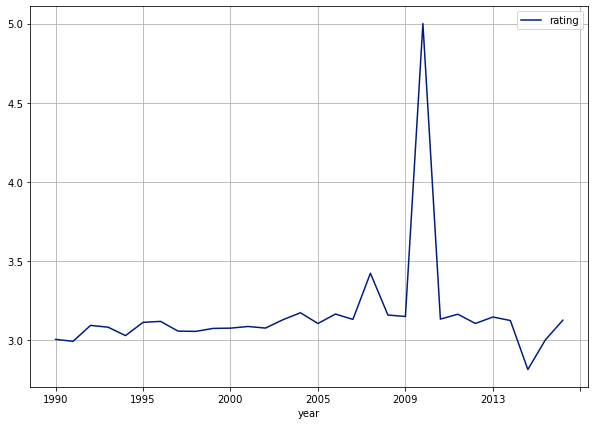

In [179]:
# Podemos ver cómo queda representado en un gráfico de la siguiente manera.

yearly_average[-30:].plot(
    x='year',
    y='rating',
    figsize=(10, 7),
    grid=True
)